In [97]:
%matplotlib inline
from __future__ import print_function
import os
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle as rect
import matplotlib.pyplot as plt
import pyemu

In [98]:
import freyberg_setup
freyberg_setup.setup_pest_pp()
working_dir = freyberg_setup.WORKING_DIR_PP

['.DS_Store', 'botm.ref', 'extract_zone_array.py', 'forecasts_true.csv', 'freyberg.bas', 'freyberg.dbf', 'freyberg.dis', 'freyberg.hds', 'freyberg.heads', 'freyberg.heads_potobs.ins', 'freyberg.hyd', 'freyberg.list', 'freyberg.locations', 'freyberg.mpbas', 'freyberg.mpenpt', 'freyberg.mplist', 'freyberg.mpnam', 'freyberg.mppthln', 'freyberg.mpsim', 'freyberg.oc', 'freyberg.pcg', 'freyberg.rivflux', 'freyberg.shp', 'freyberg.shx', 'freyberg.travel', 'freyberg.truth.lpf', 'freyberg.truth.nam', 'freyberg.truth.rch', 'freyberg.truth.riv', 'freyberg.truth.wel', 'hk.truth.ref', 'hk.zones', 'ibound.ref', 'kzone.ref', 'mpath.in', 'potobs_group.csv', 'Process_output.py', 'really_noisy_heads.txt', 'run_true_model.py', 'strt.ref', 'Weights_and_best_PHI.xlsx']

changing model workspace...
   freyberg_pp
FloPy is using the following executable to run the model: /Users/jwhite/Dev/GW1876/activities/freyberg_linearized_monte_carlo/freyberg_pp/mfnwt

                                  MODFLOW-NWT-SWR1 


### First we need to run the calibration process to get the MAP parameters and last Jacobian

In [118]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.control_data.noptmax = 8
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 3
obs = pst.observation_data
obs.loc[obs.obgnme=="calhead","weight"] = 0.5
pst.write(os.path.join(working_dir,pst_name))
os.chdir(working_dir)
pyemu.helpers.start_slaves('.',"pestpp",pst_name,num_slaves=10,master_dir='.')
os.chdir("..")

master:pestpp freyberg_pp.pst /h :4004 in .
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_0
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_1
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_2
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_3
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_4
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_5
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_6
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_7
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_8
slave:pestpp freyberg_pp.pst /h localhost:4004 in ../slave_9


In [119]:
v = pyemu.geostats.ExpVario(contribution=1.0,a=2500)
gs = pyemu.geostats.GeoStruct(variograms=v)
cov = pyemu.helpers.pilotpoint_prior_builder(pst,{gs:[os.path.join(working_dir,"hkpp.dat.tpl")]},
                                            sigma_range=6)
mc = pyemu.MonteCarlo(jco=os.path.join(working_dir,pst_name.replace(".pst",".jcb")),parcov=cov)

In [120]:
mc.jco.df()

,rch_0,rch_1,hk00,hk01,hk02,hk03,hk04,hk05,hk06,hk07,...,w0_r20_c14,w0_r26_c10,w0_r29_c06,w0_r34_c12,w1_r09_c16,w1_r11_c13,w1_r20_c14,w1_r26_c10,w1_r29_c06,w1_r34_c12
flx_constan_19700102,-1.188073e+03,0.000000e+00,-2.001403e-01,1.835591e+00,3.091495e+00,2.295887e+00,2.073084e-01,2.406464e+00,1.045273e+01,8.499462e+00,...,4.300911e+00,2.108585e+01,4.647586e+01,1.799194e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flx_in-out_19700102,-6.158534e-01,0.000000e+00,2.257059e-02,-2.349181e-02,-9.212176e-04,-9.212176e-04,5.191439e-02,2.257061e-02,2.257059e-02,-9.212176e-04,...,2.257060e-02,-2.349181e-02,-9.212176e-04,2.257060e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flx_percent_19700102,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flx_recharg_19700102,1.288333e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flx_river_l_19700102,-1.169591e+04,4.625038e-11,2.111030e-01,-1.840897e+00,-3.105831e+00,-2.276315e+00,-1.543218e-01,-2.402529e+00,-1.041151e+01,-8.486848e+00,...,5.614057e+02,1.921435e+02,1.739003e+02,6.086290e+02,4.625038e-11,4.625038e-11,4.625038e-11,4.625038e-11,4.625038e-11,4.625038e-11
flx_storage_19700102,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flx_total_19700102,-6.184112e-01,0.000000e+00,2.754742e-02,-2.867177e-02,-1.124347e-03,-1.124347e-03,5.621923e-02,2.754744e-02,2.754742e-02,-1.124347e-03,...,2.754744e-02,-2.867177e-02,-1.124347e-03,2.754743e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flx_wells_19700102,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.656568e+02,-2.132325e+02,-2.204146e+02,-7.885236e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
flx_constan_19750101,-3.069899e+01,-8.029066e+02,-1.269236e-01,1.306762e+00,2.129294e+00,1.433256e+00,1.155217e-01,1.657808e+00,7.407361e+00,5.997392e+00,...,1.959064e-01,7.652312e-01,1.479391e+00,2.256691e+00,5.799362e-02,2.441161e+00,6.718090e+00,1.945844e+01,3.624068e+01,2.408731e+02
flx_in-out_19750101,2.896270e+00,-1.911271e+00,1.151247e-03,0.000000e+00,0.000000e+00,0.000000e+00,5.756768e-02,-2.820653e-02,0.000000e+00,2.820987e-02,...,-1.092660e-01,-5.756779e-02,-2.820652e-02,-1.950402e-01,5.066007e-01,2.528415e-01,2.246316e-01,1.094962e-01,5.756766e-02,2.528415e-01


In [121]:
pst.forecast_names

['fr03c16_19750102',
 'fr03c10_19750102',
 'fr04c9_19750102',
 'fr10c2_19750102',
 'fr14c11_19750102',
 'fr16c17_19750102',
 'fr22c11_19750102',
 'fr23c16_19750102',
 'fr25c5_19750102',
 'fr27c7_19750102',
 'fr30c16_19750102',
 'fr34c8_19750102',
 'fr35c11_19750102',
 'fr02c02_19750102',
 'fr01c13_19750102',
 'fr09c15_19750102',
 'fr25c10_19750102',
 'flx_river_l_19750102',
 'travel_time']

## How does this all pan out when we run the models?

Let's look at three options:  
1. unconstrained Monte Carlo (like we did before with just K and R)  
2. posterior sampling from the ``schur`` compliment 

### first, unconstrained

In [122]:
mc = pyemu.MonteCarlo(jco=os.path.join(working_dir,pst_name.replace(".pst",".jco")), parcov=cov)
mc.draw(num_reals=1000, enforce_bounds="reset",how='gaussian')
mc.parensemble.to_csv(os.path.join(working_dir,"sweep_in.unconst.csv"))
pst.pestpp_options["sweep_output_csv_file"] = "sweep_out.unconst.csv"
pst.pestpp_options["sweep_parameter_csv_file"] = "sweep_in.unconst.csv"
pst.write(os.path.join(working_dir,pst_name))

In [123]:
os.chdir(working_dir)
pyemu.helpers.start_slaves('.','sweep',pst_name,num_slaves=10,master_dir='.')
os.chdir("..")

master:sweep freyberg_pp.pst /h :4004 in .
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_0
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_1
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_2
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_3
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_4
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_5
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_6
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_7
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_8
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_9


### now with the ```schur``` bayesian monte carlo

In [124]:
sc = pyemu.Schur(jco=os.path.join(working_dir,pst_name.replace(".pst",".jcb")))
sc.pst.parrep(os.path.join(working_dir,pst_name.replace(".pst",".parb")))
mc = pyemu.MonteCarlo(pst=pst,parcov=sc.posterior_parameter)
mc.draw(num_reals=1000, enforce_bounds="reset",how='gaussian')
mc.parensemble.to_csv(os.path.join(working_dir,"sweep_in.schur.csv"))
pst.pestpp_options["sweep_output_csv_file"] = "sweep_out.schur.csv"
pst.pestpp_options["sweep_parameter_csv_file"] = "sweep_in.schur.csv"
pst.write(os.path.join(working_dir,pst_name))
os.chdir(working_dir)
pyemu.helpers.start_slaves('.',"sweep",pst_name,num_slaves=10,master_dir='.')
os.chdir("..")

master:sweep freyberg_pp.pst /h :4004 in .
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_0
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_1
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_2
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_3
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_4
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_5
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_6
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_7
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_8
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_9


In [125]:
sc = pyemu.Schur(jco=os.path.join(working_dir,pst_name.replace(".pst",".jcb")))
sc.pst.parrep(os.path.join(working_dir,pst_name.replace(".pst",".parb")))
sc.pst.adjust_weights_resfile()
mc = pyemu.MonteCarlo(pst=pst,parcov=sc.posterior_parameter)
mc.draw(num_reals=1000, enforce_bounds="reset",how='gaussian')
mc.parensemble.to_csv(os.path.join(working_dir,"sweep_in.schur_res.csv"))
pst.pestpp_options["sweep_output_csv_file"] = "sweep_out.schur_res.csv"
pst.pestpp_options["sweep_parameter_csv_file"] = "sweep_in.schur_res.csv"
pst.write(os.path.join(working_dir,pst_name))
os.chdir(working_dir)
pyemu.helpers.start_slaves('.',"sweep",pst_name,num_slaves=10,master_dir='.')
os.chdir("..")

master:sweep freyberg_pp.pst /h :4004 in .
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_0
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_1
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_2
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_3
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_4
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_5
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_6
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_7
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_8
slave:sweep freyberg_pp.pst /h localhost:4004 in ../slave_9


In [126]:
tags = ["schur","schur_res","unconst"]
dfs = []
for tag in tags:
    df = pd.read_csv(os.path.join(working_dir,"sweep_out.{0}.csv".format(tag)))
    df.columns = [c.lower() for c in df.columns]
    dfs.append(df)


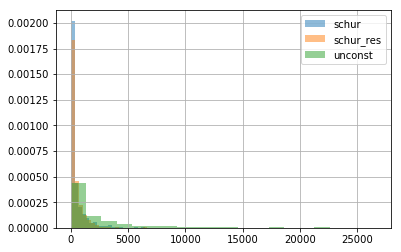

In [127]:
ax = plt.subplot(111)
for tag,df in zip(tags,dfs):
    df.phi.hist(ax=ax,bins=20,alpha=0.5,normed=True,label=tag)
#ax.set_xlim(0,2500)
plt.legend()
plt.show()

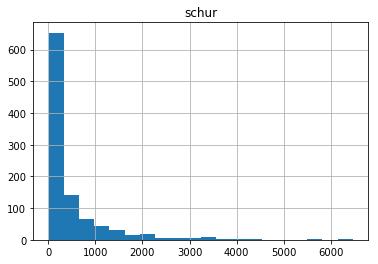

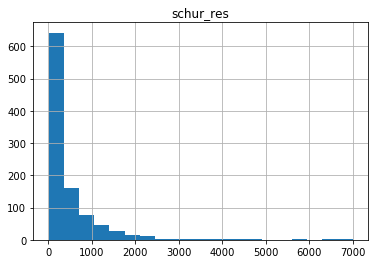

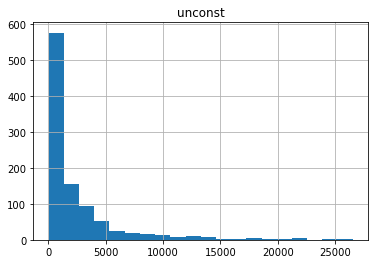

In [129]:
for tag,df in zip(tags,dfs):
    ax = df.phi.hist(bins=20)
    ax.set_title(tag)
    plt.show()
    

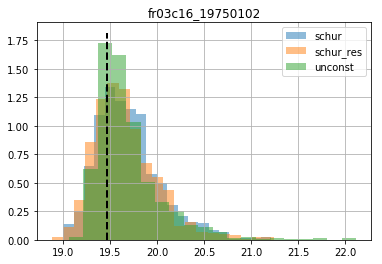

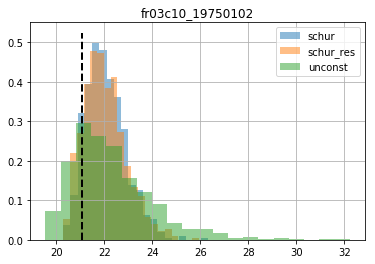

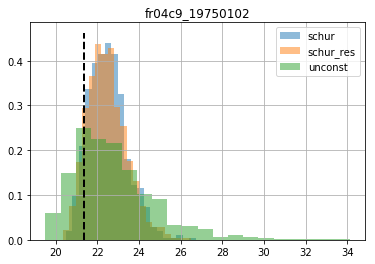

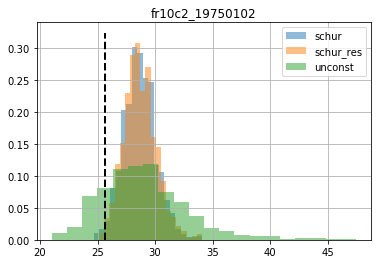

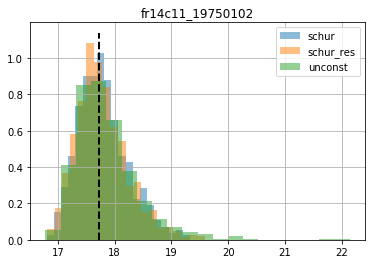

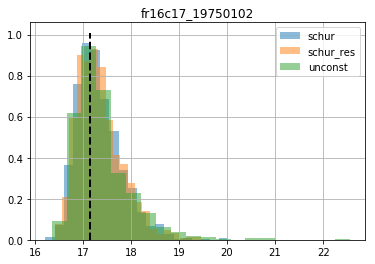

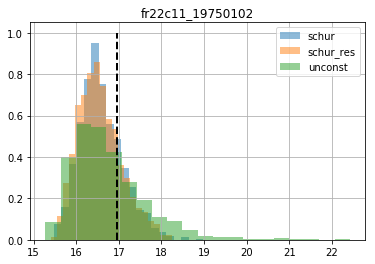

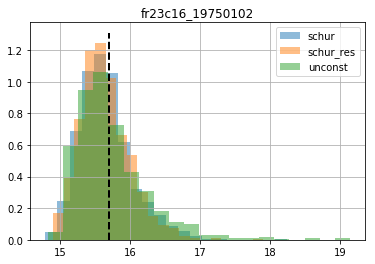

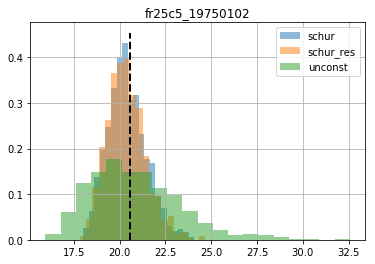

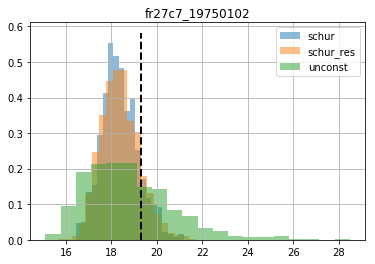

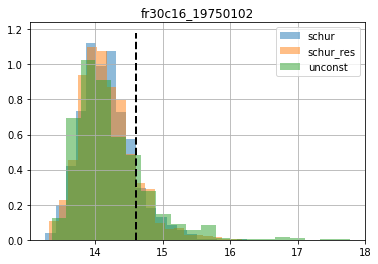

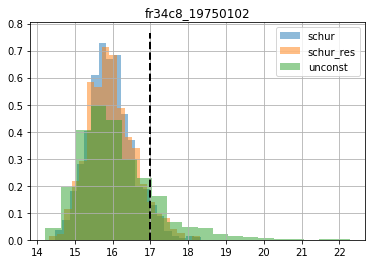

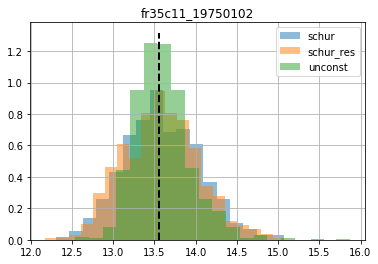

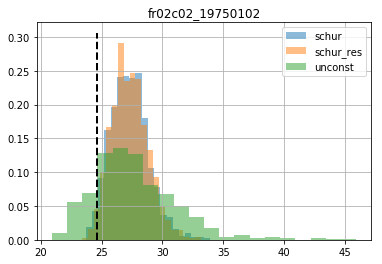

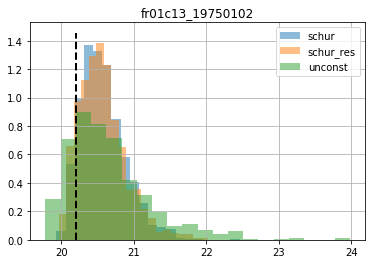

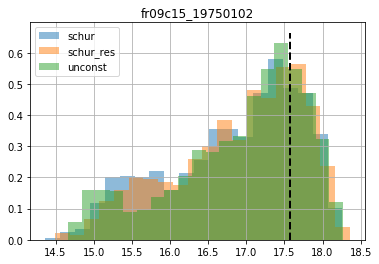

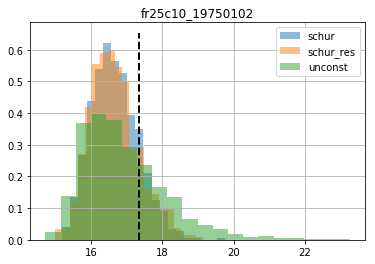

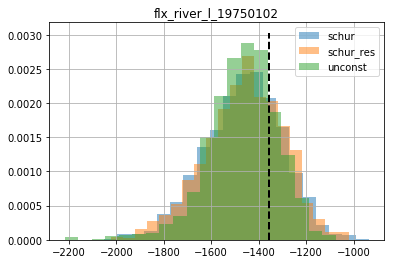

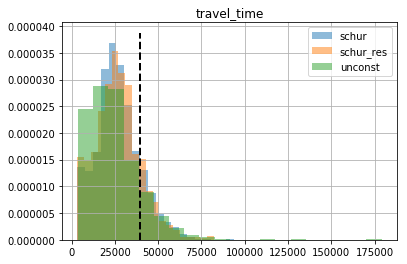

In [130]:
for forecast in mc.pst.forecast_names:
    ax = plt.subplot(111)
    for tag,df in zip(tags,dfs):
        #print(df.columns)
        df.loc[:,forecast].hist(ax=ax,bins=20,alpha=0.5,normed=True,label=tag)
    ylim = ax.get_ylim()
    v = mc.pst.observation_data.loc[forecast,"obsval"]
    ax.plot([v,v],ylim,"k--",lw=2.0)
    ax.set_title(forecast)
    ax.legend()
    plt.show()